# Определение перспективного тарифа для телеком-компании

В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. Требуется понять , какой тариф приносит больше денег.


**Описание тарифов**
*Тариф «Смарт»*
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
   - минута разговора: 3 рубля
   - сообщение: 3 рубля
   - 1 Гб интернет-трафика: 200 рублей
*Тариф «Ультра»*
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
   - минута разговора: 1 рубль
   - сообщение: 1 рубль
   - 1 Гб интернет-трафика: 150 рублей


**Примечание:**
*«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.*


**Ход исследования**

Путь к файлам:
- /datasets/calls.csv
- /datasets/internet.csv 
- /datasets/messages.csv 
- /datasets/tariffs.csv
- /datasets/users.csv 
О качестве данных ничего не известно. Поэтому перед проверкой гипотез проведем обзор данных. 

Проверим данные на ошибки и оценим их влияние на исследование. На этапе предобработки исправим самые критичные ошибки данных.
 
Таким образом, исследование содержит три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.

## Обзор и подготовка данных из файла

In [1]:
from IPython.display import display
import pandas as pd
pd.set_option('display.max_columns', None) 
import datetime
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

### В первую очередь посмотрим на данные пользователей:

In [570]:
df_users = pd.read_csv('/datasets/users.csv')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [571]:
display(df_users['churn_date'].unique())#из информационной таблицы видим пропуски в столбце,проверим его уникальные значения
display(df_users['tariff'].unique())#на всякий случай проверим, что представлены данные действительно по двум тарифам
display(sorted(df_users['city'].unique()))#на всякий случай посмотрим перечень городов, чтоб не было неявных дубликатов
df_users.duplicated().sum()#и проверим строки-дубликаты

array([nan, '2018-10-05', '2018-12-18', '2018-11-21', '2018-10-03',
       '2018-10-14', '2018-12-09', '2018-12-11', '2018-12-26',
       '2018-08-31', '2018-12-03', '2018-12-23', '2018-11-07',
       '2018-12-16', '2018-12-20', '2018-11-30', '2018-12-21',
       '2018-08-17', '2018-09-02', '2018-10-04', '2018-11-13',
       '2018-11-22', '2018-10-28', '2018-11-26', '2018-11-27',
       '2018-11-16', '2018-10-27', '2018-12-30', '2018-09-27',
       '2018-12-25', '2018-12-14', '2018-12-24', '2018-09-26',
       '2018-10-25'], dtype=object)

array(['ultra', 'smart'], dtype=object)

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

0

Из сводки видно, что нет пропусков. Однако формат данных по столбцам *'churn_date', 'reg_date'* необходимо изменить на формат даты (вместо указанного в общей информации - object):

In [572]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'],format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'],format='%Y-%m-%d')

In [573]:
df_users.info()#проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Выводы:**
- Пропуски в столбце *'churn_date'* связаны с действием тарифа на сегдоняшний день. Поэтому их заполнение не требуется.
- В данных действительно представлено два тарифа - Ультра и Смарт. 
- В названиях городо нет дубликатов. 
- Строки-дубликаты также отсутствуют.

In [574]:
df_users.head(7) #печать первых 7 строк данных о пользователях

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart


### Теперь посмотрим на данные звонков пользователей:

In [575]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Из сводки видно, что нет пропусков. Однако формат данных по столбцу *'call_date'* необходимо изменить на формат даты (вместо указанного в общей информации - object):

In [576]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'],format='%Y-%m-%d')      

Добавим в таблицу данных столбцы с данными о месяце звонков:

In [577]:
df_calls['month_call'] = pd.DatetimeIndex(df_calls['call_date']).month 
df_calls.info()#проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          202607 non-null  object        
 1   call_date   202607 non-null  datetime64[ns]
 2   duration    202607 non-null  float64       
 3   user_id     202607 non-null  int64         
 4   month_call  202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


**Выводы:**
- Таблица с данными звонков не имеет пропусков
- Все данные в таблице имеют верный формат

Согласно изначальным данным тарификация звонков идет по минутам. Поэтому необходимо перевести параметры в целочисленные значения. При этом учтем, что при переходе за кратное минуте значение итоговая длительность звонка округляется в большую сторону (значения "0" мы оставляем как есть):

In [578]:
df_calls.loc[df_calls['duration'] == 0, 'duration_min'] = 0
df_calls.loc[df_calls['duration'] != 0, 'duration_min'] =np.ceil(df_calls['duration'])
df_calls = df_calls.drop('duration', axis = 1)
df_calls.head(7)#проверим

,id,call_date,user_id,month_call,duration_min
0,1000_0,2018-07-25,1000,7,0.0
1,1000_1,2018-08-17,1000,8,0.0
2,1000_2,2018-06-11,1000,6,3.0
3,1000_3,2018-09-21,1000,9,14.0
4,1000_4,2018-12-15,1000,12,6.0
5,1000_5,2018-11-02,1000,11,0.0
6,1000_6,2018-10-18,1000,10,0.0


In [579]:
#df_calls.loc[df_calls['duration'] == 0, 'duration_min'] = 0
#df_calls.loc[df_calls['duration'] != 0, 'duration_min'] = df_calls['duration'].astype('int')+1
#df_calls = df_calls.drop('duration', axis = 1)
#df_calls.head(7)#проверим

### Теперь посмотрим на данные о сообщениях пользователей:

In [580]:
df_messages = pd.read_csv('/datasets/messages.csv')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Из сводки видно, что нет пропусков. Однако формат данных по столбцу *'message_date'* необходимо изменить на формат даты (вместо указанного в общей информации - object):

In [581]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'],format = '%Y-%m-%d')
df_messages.info()#проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Добавим в таблицу данных столбцы с данными о месяце сообщения:

In [582]:
df_messages['month_sms'] = pd.DatetimeIndex(df_messages['message_date']).month 
df_messages.info()#проверим
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month_sms     123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


,id,message_date,user_id,month_sms
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


**Выводы:**
- Таблица с данными сообщений не имеет пропусков
- Все данные в таблице имеют верный формат

In [583]:
#df_messages['month_sms'] = df_messages['message_date'].dt.to_period('M')
#df_messages.head()

### Теперь посмотрим на данные об интернет-сессиях пользователей:

In [584]:
df_internet = pd.read_csv('/datasets/internet.csv')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Из сводки видно, что нет пропусков. Однако есть лишний столбец, повторяющий индексацию строк, который удалим, а также формат данных по столбцу *'session_date'* необходимо изменить на формат даты (вместо указанного в общей информации - object):

In [585]:
df_internet.drop('Unnamed: 0', axis=1)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')

Добавим в таблицу данных столбцы с данными о месяце интернет-трафика:

In [586]:
df_internet['month_internet'] = pd.DatetimeIndex(df_internet['session_date']).month 
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      149396 non-null  int64         
 1   id              149396 non-null  object        
 2   mb_used         149396 non-null  float64       
 3   session_date    149396 non-null  datetime64[ns]
 4   user_id         149396 non-null  int64         
 5   month_internet  149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


,Unnamed: 0,id,mb_used,session_date,user_id,month_internet
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


**Выводы:**
- Таблица с данными интернет-трафика не имеет пропусков
- Все данные в таблице имеют верный формат

### Проверим данные о тарифах

In [587]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_tariffs.info()
display(df_tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Выводы:**
- Таблица сводного характера из двух строк о детализациях тарифного плана. Все данные имеют верный формат. 

### ВЫВОДЫ

Проведен агализ предоставленных данных от Заказчика. Мы получили 4 таблица касаемо пользователей и их трат мобильных трафиков в течение года и 1 сводную таблицу, в которой представлена инфорация по условиям тарифов. Пропусков в данных не наблюдалось, дубликаты отсутствовали. Проведены изменения форматов данных (для столбцов дат) в каждой из 4х пользовательских таблиц и дополнительно созданы новые столбцы данных касаемо месяца использования тго или иного мобильного трафика. 

## Подготовка данных

Теперь требуется объединить нужные нам таблицы в одну, для упрощения дальнейшей работы.

Очевидно, что все таблицы объединяются по параметру *'user_id'*. Однако в виду нескольких операций от каждого пользователя по каждой мобильной трате данных в таблицах звонков, смс и интернет-трафика больше чем в таблице *'df_users'*. 

Попробуем сначала проанализировать траты каждого пользователя по каждой мобильной статье ПОМЕСЯЧНО:

Создадим таблицу по звонкам каждого пользователя за каждый месяц:

In [588]:
df_calls.head()

,id,call_date,user_id,month_call,duration_min
0,1000_0,2018-07-25,1000,7,0.0
1,1000_1,2018-08-17,1000,8,0.0
2,1000_2,2018-06-11,1000,6,3.0
3,1000_3,2018-09-21,1000,9,14.0
4,1000_4,2018-12-15,1000,12,6.0


In [589]:
df_calls_month = df_calls.pivot_table(index=['user_id','month_call'], values='duration_min',aggfunc=['sum'])
df_calls_month = pd.DataFrame(df_calls_month.to_records()) 
df_calls_month.columns = ['user_id', 'month', 'call']

display(df_calls_month.sort_values(by=['user_id', 'month']))

,user_id,month,call
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0
...,...,...,...
3169,1498,10,247.0
3170,1499,9,70.0
3171,1499,10,449.0
3172,1499,11,612.0


Мы получили таблицу звонков пользователей по месяцам.

Создадим аналогично таблицу по сообщениям каждого пользователя за каждый месяц:

In [590]:
df_messages_month = df_messages.pivot_table(index=['user_id','month_sms'], values='id',aggfunc=['count'])
df_messages_month = pd.DataFrame(df_messages_month.to_records()) 
df_messages_month.columns = ['user_id', 'month', 'sms']

display(df_messages_month.sort_values(by=['user_id', 'month']))

,user_id,month,sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Мы получили таблицу сообщений пользователей по месяцам.

Создадим аналогично таблицу по интернет-трафику каждого пользователя за каждый месяц. 

Согласно изначальным данным тарификация интернета идет по Гб. Поэтому параллельно необходимо перевести параметры трафика в целочисленные значения. При этом учтем, что при переходе за кратное Гб значение итоговая длительность трафика округляется в большую сторону (значения "0" мы оставляем как есть):

In [591]:
df_internet_month = df_internet.pivot_table(index=['user_id','month_internet'], values='mb_used',aggfunc=['sum'])
df_internet_month = pd.DataFrame(data = np.ceil(df_internet_month.values/1024), columns = df_internet_month.columns, index = df_internet_month.index)
df_internet_month = pd.DataFrame(df_internet_month.to_records())
df_internet_month.columns = ['user_id', 'month', 'gb_used']
display(df_internet_month.sort_values(by=['user_id', 'month']))

,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
...,...,...,...
3198,1498,10,21.0
3199,1499,9,2.0
3200,1499,10,18.0
3201,1499,11,18.0


Мы получили таблицу интернет-трафика пользователей.

По каждому пользователю получили аналитику по месяцам 2018 году по тратам тарифа на связь (в минутах), смс (количество штук) и интернет (Гб). Пропуски в данных за какой-либо месяц по пользователю в каждой таблице связаны с отсуствием абонента на тарифе (отсчет идет от даты подключения к тарифу).

Объединим данные пользователей с данными по мобильным тратам в **таблицу всего трафика по месяцам**:

In [592]:
df_all_traffic = df_calls_month.merge(df_messages_month,how='left')
df_all_traffic = df_all_traffic.merge(df_internet_month,how='left')
df_all_traffic = df_all_traffic.merge(df_users, how = 'left')

In [593]:
df_all_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3174 non-null   int64         
 1   month       3174 non-null   int64         
 2   call        3174 non-null   float64       
 3   sms         2678 non-null   float64       
 4   gb_used     3163 non-null   float64       
 5   age         3174 non-null   int64         
 6   churn_date  187 non-null    datetime64[ns]
 7   city        3174 non-null   object        
 8   first_name  3174 non-null   object        
 9   last_name   3174 non-null   object        
 10  reg_date    3174 non-null   datetime64[ns]
 11  tariff      3174 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 322.4+ KB


In [594]:
df_all_traffic.head(10)

,user_id,month,call,sms,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10,350.0,73.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11,338.0,58.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12,333.0,70.0,10.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11,430.0,NaN,18.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12,414.0,NaN,14.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart


**Мы получили новую таблицу, по 500 пользователям, в которой по месяцам видим траты каждого пользователя в минутах, штуках смс и Гб интернета. Пропуски NaN связаны с неиспользованием какого-либо траффика.**


Добавим в эту таблицу данные по тарифам из таблицы *'df_tariffs'*:

In [595]:
df_all_traffic.loc[df_all_traffic['tariff'] =='ultra', 'messages_included'] = df_tariffs['messages_included'].values[1]
df_all_traffic.loc[df_all_traffic['tariff'] =='smart', 'messages_included'] = df_tariffs['messages_included'].values[0]

df_all_traffic.loc[df_all_traffic['tariff'] =='ultra', 'gb_per_month_included'] = df_tariffs['mb_per_month_included'].values[1]/1024
df_all_traffic.loc[df_all_traffic['tariff'] =='smart', 'gb_per_month_included'] = df_tariffs['mb_per_month_included'].values[0]/1024  
                                                     
df_all_traffic.loc[df_all_traffic['tariff'] =='ultra', 'minutes_included'] = df_tariffs['minutes_included'].values[1]
df_all_traffic.loc[df_all_traffic['tariff'] =='smart', 'minutes_included'] = df_tariffs['minutes_included'].values[0]  

df_all_traffic.loc[df_all_traffic['tariff'] =='ultra', 'rub_monthly_fee'] = df_tariffs['rub_monthly_fee'].values[1]
df_all_traffic.loc[df_all_traffic['tariff'] =='smart', 'rub_monthly_fee'] = df_tariffs['rub_monthly_fee'].values[0]   

df_all_traffic.loc[df_all_traffic['tariff'] =='ultra', 'rub_per_gb'] = df_tariffs['rub_per_gb'].values[1]
df_all_traffic.loc[df_all_traffic['tariff'] =='smart', 'rub_per_gb'] = df_tariffs['rub_per_gb'].values[0]  

df_all_traffic.loc[df_all_traffic['tariff'] =='ultra', 'rub_per_message'] = df_tariffs['rub_per_message'].values[1]
df_all_traffic.loc[df_all_traffic['tariff'] =='smart', 'rub_per_message'] = df_tariffs['rub_per_message'].values[0]  

df_all_traffic.loc[df_all_traffic['tariff'] =='ultra', 'rub_per_minute'] = df_tariffs['rub_per_minute'].values[1]
df_all_traffic.loc[df_all_traffic['tariff'] =='smart', 'rub_per_minute'] = df_tariffs['rub_per_minute'].values[0] 

df_all_traffic.head()

,user_id,month,call,sms,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
1,1000,6,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
2,1000,7,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
3,1000,8,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
4,1000,9,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0


Прежде чем заполнить  пропуски нулевым значением, проверим, есть ли нулевые значения по пользователям в звонках,смс и интернету за весь год:

In [596]:
display(df_all_traffic.query('call == 0 | sms == 0 | gb_used == 0'))

,user_id,month,call,sms,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
584,1094,5,107.0,3.0,0.0,37,NaT,Новосибирск,Даниэла,Пугачева,2018-05-28,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
1493,1240,2,0.0,NaN,1.0,30,NaT,Воронеж,Зинаида,Шарова,2018-02-27,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
1605,1257,7,0.0,146.0,20.0,21,NaT,Санкт-Петербург,Габриель,Жданов,2018-06-17,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
1606,1257,8,0.0,157.0,25.0,21,NaT,Санкт-Петербург,Габриель,Жданов,2018-06-17,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
1607,1257,9,0.0,153.0,23.0,21,NaT,Санкт-Петербург,Габриель,Жданов,2018-06-17,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0
2278,1365,10,43.0,1.0,0.0,38,NaT,Ростов-на-Дону,Георгий,Вишняков,2018-10-31,smart,50.0,15.0,500.0,550.0,200.0,3.0,3.0
2318,1373,1,0.0,28.0,9.0,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart,50.0,15.0,500.0,550.0,200.0,3.0,3.0
2321,1373,4,0.0,48.0,20.0,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart,50.0,15.0,500.0,550.0,200.0,3.0,3.0


Видим, что у 5 пользователей есть нулевые траты по трафикам, что вполне может быть, когда пользователь не использует какие-то опции в тот или иной месяц. Заменим все пропуски на 0.

In [597]:
df_all_traffic = df_all_traffic.fillna(0)

Напишем функцию, которая считает трафик. потраченный сверхтарифа в месяц:

In [598]:
#функция считает трафик (минуты,смс или инет потраченные сверхтарифа)
def limit(data,traffic,over_traffic,included): 
    data.loc[data[traffic] ==0, over_traffic] = 0
    data.loc[data[traffic] !=0, over_traffic] = data[included]-data[traffic]#считаем разность по тарифу

Применим функцию к 12 месяцам по звонкам, смс и интернету:

In [599]:
limit(df_all_traffic,'call','over_call', 'minutes_included')    
limit(df_all_traffic,'sms','over_sms', 'messages_included')   
limit(df_all_traffic,'gb_used','over_inet', 'gb_per_month_included')   
df_all_traffic.head()

,user_id,month,call,sms,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_call,over_sms,over_inet
0,1000,5,159.0,22.0,3.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2841.0,978.0,27.0
1,1000,6,172.0,60.0,23.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2828.0,940.0,7.0
2,1000,7,340.0,75.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2660.0,925.0,16.0
3,1000,8,408.0,81.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2592.0,919.0,16.0
4,1000,9,466.0,57.0,15.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2534.0,943.0,15.0


Напишем функцию, которая считает плату за сверхтарифный трафик:

In [600]:
#функция считает плату (минуты,смс или инет потраченные сверхтарифа)
def values(data,over_traffic,values,rub_per):
    data.loc[data[over_traffic] ==0, values] = 0
    data.loc[data[over_traffic] <0, values] = abs(data[over_traffic]*data[rub_per])
    data.loc[data[over_traffic] >=0, values] = 0

In [601]:
values(df_all_traffic,'over_call','values_call','rub_per_minute')    
values(df_all_traffic,'over_sms','values_sms','rub_per_message')    
values(df_all_traffic,'over_inet','values_inet','rub_per_gb')    
df_all_traffic.head()

,user_id,month,call,sms,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_call,over_sms,over_inet,values_call,values_sms,values_inet
0,1000,5,159.0,22.0,3.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2841.0,978.0,27.0,0.0,0.0,0.0
1,1000,6,172.0,60.0,23.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2828.0,940.0,7.0,0.0,0.0,0.0
2,1000,7,340.0,75.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2660.0,925.0,16.0,0.0,0.0,0.0
3,1000,8,408.0,81.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2592.0,919.0,16.0,0.0,0.0,0.0
4,1000,9,466.0,57.0,15.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2534.0,943.0,15.0,0.0,0.0,0.0


Напишем функцию, которая посчитает плату абонента за месяц:

In [602]:
#хотя можно было бы обойтись и без функции. а сразу написать все))
def profit(data,profit,call,sms,gb_used,all_profit,fee):
    data[profit] = data[call]+data[sms]+data[gb_used]
    data.loc[data[profit]== 0, all_profit]= data[fee]
    data.loc[data[profit] != 0, all_profit] = data[profit] + data[fee]

In [603]:
profit(df_all_traffic,'profit','values_call','values_sms','values_inet','all_profit','rub_monthly_fee')
df_all_traffic.head()

,user_id,month,call,sms,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_call,over_sms,over_inet,values_call,values_sms,values_inet,profit,all_profit
0,1000,5,159.0,22.0,3.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2841.0,978.0,27.0,0.0,0.0,0.0,0.0,1950.0
1,1000,6,172.0,60.0,23.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2828.0,940.0,7.0,0.0,0.0,0.0,0.0,1950.0
2,1000,7,340.0,75.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2660.0,925.0,16.0,0.0,0.0,0.0,0.0,1950.0
3,1000,8,408.0,81.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2592.0,919.0,16.0,0.0,0.0,0.0,0.0,1950.0
4,1000,9,466.0,57.0,15.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2534.0,943.0,15.0,0.0,0.0,0.0,0.0,1950.0


Удалим личние столбцы для облегчения работы:

In [604]:
df_profit = df_all_traffic.drop(df_all_traffic.loc[:, 'age' : 'reg_date' ].columns, axis = 1 )
df_profit = df_profit.drop(df_profit.loc[:, 'messages_included' : 'rub_per_minute' ].columns, axis = 1 )
df_profit.head(10)

,user_id,month,call,sms,gb_used,tariff,over_call,over_sms,over_inet,values_call,values_sms,values_inet,profit,all_profit
0,1000,5,159.0,22.0,3.0,ultra,2841.0,978.0,27.0,0.0,0.0,0.0,0.0,1950.0
1,1000,6,172.0,60.0,23.0,ultra,2828.0,940.0,7.0,0.0,0.0,0.0,0.0,1950.0
2,1000,7,340.0,75.0,14.0,ultra,2660.0,925.0,16.0,0.0,0.0,0.0,0.0,1950.0
3,1000,8,408.0,81.0,14.0,ultra,2592.0,919.0,16.0,0.0,0.0,0.0,0.0,1950.0
4,1000,9,466.0,57.0,15.0,ultra,2534.0,943.0,15.0,0.0,0.0,0.0,0.0,1950.0
5,1000,10,350.0,73.0,15.0,ultra,2650.0,927.0,15.0,0.0,0.0,0.0,0.0,1950.0
6,1000,11,338.0,58.0,15.0,ultra,2662.0,942.0,15.0,0.0,0.0,0.0,0.0,1950.0
7,1000,12,333.0,70.0,10.0,ultra,2667.0,930.0,20.0,0.0,0.0,0.0,0.0,1950.0
8,1001,11,430.0,0.0,18.0,smart,70.0,0.0,-3.0,0.0,0.0,600.0,600.0,1150.0
9,1001,12,414.0,0.0,14.0,smart,86.0,0.0,1.0,0.0,0.0,0.0,0.0,550.0


Мы получили итоговую **таблицу *'df_profit'* с выручкой мобильного оператора**.

**ВЫВОДЫ**

Подготовлены данные по 500 пользователям с тратами по каждому месяцу в 2018 году по каждой статье мобильного трафика (связь/мин, смс/шт, интернет/Гб) при помощи слияния файлов с данными и пересчет тарфика за каждый месяц. В данных не проведена замена NaN на нулевые значения для верного подсчета выручки мобильного оператора!

Дополнительно подготовлена таблица с выручкой мобильного оператора за каждый месяц по каждому пользователю. 

Таблицы - **'df_all_traffic'** (траты каждого пользователя ПО МЕСЯЦАМ в минутах, штуках смс и Гб интернета) **'df_tariff_traffic'** (ежемесячный трафик без данных пользователей) и **'df_profit'** (выручка мобильного оператора за каждый месяц по каждому пользователю)* - требуются для дальнейшей работы и анализа.

## Анализ данных

Для анализа поведения клиентов будем использовать таблицу *'df_profit'*, в которой представлены данные абонентов по каждому трафику и выручке по месяцам.

In [606]:
df_profit.head()

,user_id,month,call,sms,gb_used,tariff,over_call,over_sms,over_inet,values_call,values_sms,values_inet,profit,all_profit
0,1000,5,159.0,22.0,3.0,ultra,2841.0,978.0,27.0,0.0,0.0,0.0,0.0,1950.0
1,1000,6,172.0,60.0,23.0,ultra,2828.0,940.0,7.0,0.0,0.0,0.0,0.0,1950.0
2,1000,7,340.0,75.0,14.0,ultra,2660.0,925.0,16.0,0.0,0.0,0.0,0.0,1950.0
3,1000,8,408.0,81.0,14.0,ultra,2592.0,919.0,16.0,0.0,0.0,0.0,0.0,1950.0
4,1000,9,466.0,57.0,15.0,ultra,2534.0,943.0,15.0,0.0,0.0,0.0,0.0,1950.0


Посчитаем среднее количество, дисперсию и стандартное отклонение в месяц по каждому тарифу - по минутам разговора, количеству сообщений и объему интернет трафика.

### Минуты разговора в месяц. Среднее, дисперсия, стандартное отклонение

In [607]:
df_min_call_month = df_profit.pivot_table(index='month',columns = 'tariff', values= 'call',aggfunc=['mean'])
df_min_call_month = pd.DataFrame(df_min_call_month.to_records())
df_min_call_month.columns = ['month','smart', 'ultra']


In [608]:
display(df_min_call_month)

,month,smart,ultra
0,1,203.852941,428.111111
1,2,298.689655,297.125000
2,3,390.051948,489.648649
3,4,367.133929,475.301887
4,5,387.361702,534.250000
5,6,398.067485,497.469136
6,7,408.353234,564.397727
7,8,423.269231,530.611650
8,9,430.266409,558.882883
9,10,427.590444,581.728814


Используя данные этой таблицы, найдем среднее количество, дисперсию и стандартное отклонение по минутам разговора в месяц:

In [609]:
mean_smart_call = df_min_call_month['smart'].mean()
mean_ultra_call = df_min_call_month['ultra'].mean()

print('Среднее количество минут разговора в месяц по тарифу SMART', round(mean_smart_call, 2))
print('Среднее количество минут разговора в месяц по тарифу ULTRA', round(mean_ultra_call, 2))
print('')

var_smart_call = np.var(df_min_call_month['smart'],ddof=1)
var_ultra_call = np.var(df_min_call_month['ultra'],ddof=1)

print('Дисперсия минут разговора по тарифу SMART', round(var_smart_call, 2))
print('Дисперсия минут разговора по тарифу ULTRA', round(var_ultra_call, 2))
print('')


standard_smart_call = np.std(df_min_call_month['smart'],ddof=1)
standard_ultra_call = np.std(df_min_call_month['ultra'],ddof=1)

print('Стандартное отклонение минут разговора по тарифу SMART', round(standard_smart_call, 2))
print('Стандартное отклонение минут разговора по тарифу ULTRA', round(standard_ultra_call, 2))



Среднее количество минут разговора в месяц по тарифу SMART 387.61
Среднее количество минут разговора в месяц по тарифу ULTRA 511.23

Дисперсия минут разговора по тарифу SMART 5296.9
Дисперсия минут разговора по тарифу ULTRA 7185.12

Стандартное отклонение минут разговора по тарифу SMART 72.78
Стандартное отклонение минут разговора по тарифу ULTRA 84.77


### Сообщения в месяц. Среднее, дисперсия, стандартное отклонение

In [610]:
df_piece_sms_month = df_profit.pivot_table(index='month',columns = 'tariff', values= 'sms',aggfunc=['mean'])
df_piece_sms_month = pd.DataFrame(df_piece_sms_month.to_records())
df_piece_sms_month.columns = ['month','smart', 'ultra']

In [611]:
display(df_piece_sms_month)

,month,smart,ultra
0,1,18.235294,33.777778
1,2,24.086207,21.958333
2,3,31.857143,32.297297
3,4,30.741071,32.584906
4,5,33.773050,37.859375
5,6,33.312883,40.049383
6,7,33.751244,48.477273
7,8,33.709402,47.864078
8,9,33.644788,51.810811
9,10,33.808874,58.466102


Используя данные этой таблицы, найдем среднее количество, дисперсию и стандартное отклонение по количеству сообщений в месяц:

In [612]:
mean_smart_sms = df_piece_sms_month['smart'].mean()
mean_ultra_sms = df_piece_sms_month['ultra'].mean()

print('Среднее количество сообщений в месяц по тарифу SMART', round(mean_smart_sms, 0))
print('Среднее количество сообщений в месяц по тарифу ULTRA', round(mean_ultra_sms, 0))
print('')

var_smart_sms = np.var(df_piece_sms_month['smart'],ddof=1)
var_ultra_sms = np.var(df_piece_sms_month['ultra'],ddof=1)

print('Дисперсия сообщений разговора по тарифу SMART', round(var_smart_sms, 0))
print('Дисперсия сообщений разговора по тарифу ULTRA', round(var_ultra_sms, 0))
print('')


standard_smart_sms = np.std(df_piece_sms_month['smart'],ddof=1)
standard_ultra_sms = np.std(df_piece_sms_month['ultra'],ddof=1)

print('Стандартное отклонение сообщений по тарифу SMART', round(standard_smart_sms, 0))
print('Стандартное отклонение сообщений по тарифу ULTRA', round(standard_ultra_sms, 0))


Среднее количество сообщений в месяц по тарифу SMART 31.0
Среднее количество сообщений в месяц по тарифу ULTRA 43.0

Дисперсия сообщений разговора по тарифу SMART 26.0
Дисперсия сообщений разговора по тарифу ULTRA 149.0

Стандартное отклонение сообщений по тарифу SMART 5.0
Стандартное отклонение сообщений по тарифу ULTRA 12.0


### Интернет-трафик в месяц. Среднее, дисперсия, стандартное отклонение

In [613]:
df_gb_inet_month = df_profit.pivot_table(index='month',columns = 'tariff', values= 'gb_used',aggfunc=['mean'])
df_gb_inet_month = pd.DataFrame(df_gb_inet_month.to_records())
df_gb_inet_month.columns = ['month','smart', 'ultra']

In [614]:
display(df_gb_inet_month)

,month,smart,ultra
0,1,8.735294,13.222222
1,2,11.844828,12.000000
2,3,15.233766,17.648649
3,4,13.625000,17.528302
4,5,15.907801,19.671875
5,6,15.969325,18.925926
6,7,15.875622,20.443182
7,8,16.760684,19.611650
8,9,16.389961,19.135135
9,10,16.870307,20.093220


Используя данные этой таблицы, найдем среднее количество, дисперсию и стандартное отклонение по количеству сообщений в месяц:

In [615]:
mean_smart_inet = df_gb_inet_month['smart'].mean()
mean_ultra_inet = df_gb_inet_month['ultra'].mean()

print('Среднее количество Гб в месяц по тарифу SMART', round(mean_smart_inet, 2))
print('Среднее количество Гб в месяц по тарифу ULTRA', round(mean_ultra_inet, 2))
print('')

var_smart_inet = np.var(df_gb_inet_month['smart'],ddof=1)
var_ultra_inet = np.var(df_gb_inet_month['ultra'],ddof=1)

print('Дисперсия Гб по тарифу SMART', round(var_smart_inet, 2))
print('Дисперсия Гб по тарифу ULTRA', round(var_ultra_inet, 2))
print('')


standard_smart_inet = np.std(df_gb_inet_month['smart'],ddof=1)
standard_ultra_inet = np.std(df_gb_inet_month['ultra'],ddof=1)

print('Стандартное отклонение Гб по тарифу SMART', round(standard_smart_inet, 2))
print('Стандартное отклонение Гб по тарифу ULTRA', round(standard_ultra_inet, 2))


Среднее количество Гб в месяц по тарифу SMART 15.2
Среднее количество Гб в месяц по тарифу ULTRA 18.3

Дисперсия Гб по тарифу SMART 6.91
Дисперсия Гб по тарифу ULTRA 8.37

Стандартное отклонение Гб по тарифу SMART 2.63
Стандартное отклонение Гб по тарифу ULTRA 2.89


### Гистрограммы данных по месяцам

<AxesSubplot:title={'center':'Среднее количество Гб в месяц'}>

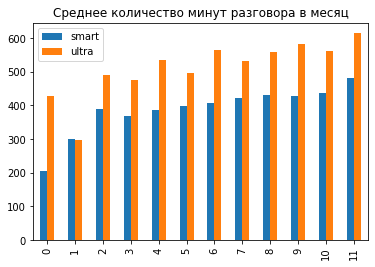

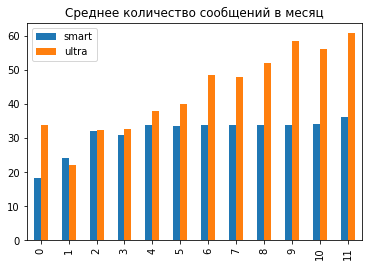

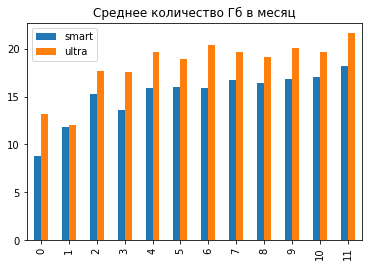

In [616]:
df_min_call_month.plot(y=['smart','ultra'],kind='bar', title ='Среднее количество минут разговора в месяц')
df_piece_sms_month.plot(y=['smart','ultra'],kind='bar', title ='Среднее количество сообщений в месяц')
df_gb_inet_month.plot(y=['smart','ultra'],kind='bar', title ='Среднее количество Гб в месяц')

По гитограммам за год видно, что среднее количество трафика по звонкам, сообщениям и интернету растут по обоим тарифам в течение года.Что говорит о том, что потребности в трафике увеличиваются. И со временем пользователь будет искать другой тариф, если его траты будут выходить за абонентскую плату. 

### Гистрограммы частот данных и плотности  данных

#### Данные по звонкам

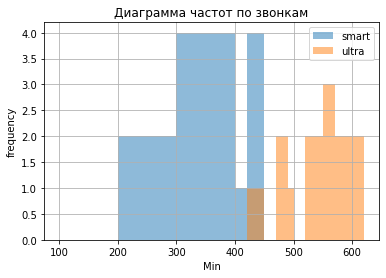

In [617]:
#Диаграмма частот 
df_min_call_month['smart'].hist(bins=[100,200, 300, 400, 420, 450, 470], alpha=0.5, label='smart')
df_min_call_month['ultra'].hist(bins=[350, 420, 450, 470, 490,500,520,550,570,620], alpha=0.5, label='ultra')
plt.ylabel('frequency')
plt.xlabel('Min')
plt.title('Диаграмма частот по звонкам')
plt.legend()


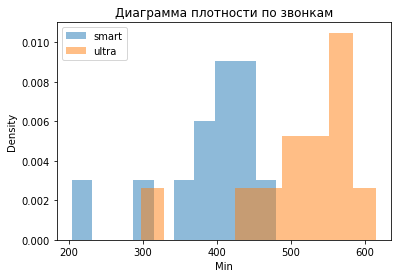

In [618]:
#Диаграмма плотности
bins = np.arange(min(df_min_call_month['smart']), max(df_min_call_month['smart']))
plt.hist(df_min_call_month['smart'], bins = 10, density = True,alpha=0.5, label='smart')
plt.ylabel('Density')
plt.xlabel('Min')

bins = np.arange(min(df_min_call_month['ultra']), max(df_min_call_month['ultra']))
plt.hist(df_min_call_month['ultra'], bins = 10, density = True,alpha=0.5, label='ultra')
plt.ylabel('Density')
plt.xlabel('Min')
plt.legend()
plt.title('Диаграмма плотности по звонкам')

plt.show()

По диаграммам мы видим скошенность данных влево, по обоим тарифам. Это говорит о том, что медиана больше среднего значения. 

In [619]:
mean_smart_call = df_min_call_month['smart'].mean()
mean_ultra_call = df_min_call_month['ultra'].mean()

print(mean_smart_call)
print(mean_ultra_call)

median_smart_call = df_min_call_month['smart'].median()
median_ultra_call = df_min_call_month['ultra'].median()

print(median_smart_call)
print(median_ultra_call)

387.605809617519
511.23471423122083
403.2103592467113
532.4308252427185


Медианное значение у тарифа Смарт чуть меньше, чем у тарифа Ультра, датасет скошен влево. По обоим тарифам пользователи тратят меньше медианного значения. Для мобильного оператора нет смысла увеличивать количество минут по тарифам.

#### Данные по сообщениям

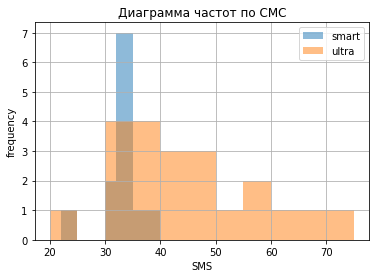

In [620]:
#Диаграмма частот 
df_piece_sms_month['smart'].hist(bins=[20,22,25,27,30,32,35,40,42], alpha=0.5, label='smart')
df_piece_sms_month['ultra'].hist(bins=[20,25,30,40,50,55,60,75], alpha=0.5, label='ultra')

plt.ylabel('frequency')
plt.xlabel('SMS')
plt.title('Диаграмма частот по СМС')

plt.legend()

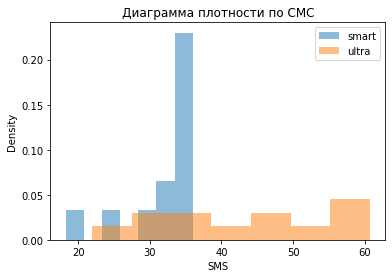

In [621]:
#Диаграмма плотности
bins = np.arange(min(df_piece_sms_month['smart']), max(df_piece_sms_month['smart']))
plt.hist(df_piece_sms_month['smart'], bins = 7, density = True,alpha=0.5, label='smart')
plt.ylabel('Density')
plt.xlabel('SMS')

bins = np.arange(min(df_piece_sms_month['ultra']), max(df_piece_sms_month['ultra']))
plt.hist(df_piece_sms_month['ultra'], bins = 7, density = True,alpha=0.5, label='ultra')
plt.ylabel('Density')
plt.xlabel('SMS')
plt.legend()
plt.title('Диаграмма плотности по СМС')


plt.show()

По диаграммам мы видим скошенность данных влево, по тарифу Смарт. Это говорит о том, что медиана больше среднего значения. У тарифа Ультра распределение приближено к такому же скошенному влево виду. 

In [622]:
mean_smart_sms = df_piece_sms_month['smart'].mean()
mean_ultra_sms = df_piece_sms_month['ultra'].mean()

print(mean_smart_sms)
print(mean_ultra_sms)

median_smart_sms = df_piece_sms_month['smart'].median()
median_ultra_sms = df_piece_sms_month['ultra'].median()

print(median_smart_sms)
print(median_ultra_sms)

31.41980116387209
43.49158883591837
33.67709467709468
43.956730192976146


Медианное значение у тарифа Смарт чуть меньше, чем у тарифа Ультра, датасет скошен влево. По обоим тарифам пользователи тратят меньше медианного значения. Для мобильного оператора нет смысла увеличивать количество смс по тарифам.

#### Данные по интернет-трафику

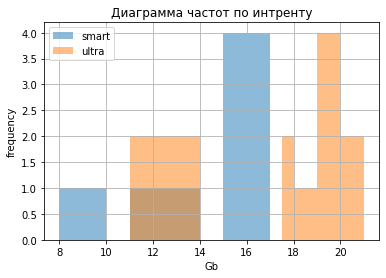

In [623]:
#Диаграмма частот
df_gb_inet_month['smart'].hist(bins=[8,10,11,13,14,15,16,17,18], alpha=0.5, label='smart')
df_gb_inet_month['ultra'].hist(bins=[9,11,14,16,17,17.5,18,19,20,21], alpha=0.5, label='ultra')

plt.ylabel('frequency')
plt.xlabel('Gb')
plt.title('Диаграмма частот по интренту')

plt.legend()

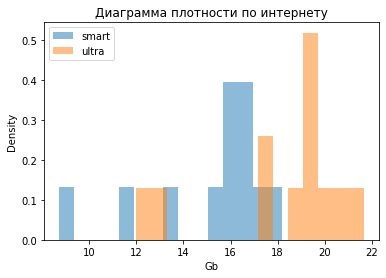

In [624]:
bins = np.arange(min(df_gb_inet_month['smart']), max(df_gb_inet_month['smart']))
plt.hist(df_gb_inet_month['smart'], bins = 15, density = True,alpha=0.5, label='smart')
plt.ylabel('Density')
plt.xlabel('Gb')

bins = np.arange(min(df_gb_inet_month['ultra']), max(df_gb_inet_month['ultra']))
plt.hist(df_gb_inet_month['ultra'], bins = 15, density = True,alpha=0.5, label='ultra')
plt.ylabel('Density')
plt.xlabel('Gb')
plt.legend()
plt.title('Диаграмма плотности по интернету')


plt.show()

По диаграммам мы видим скошенность данных влево, по тарифу Смарт. Это говорит о том, что медиана больше среднего значения. У тарифа Ультра распределение приближено к такому же скошенному влево виду, однако есть выброс на 11-13 Гб с большой долей пользователей, которые тратят такой трафик (примерно 30%). 

In [625]:
mean_smart_inet = df_gb_inet_month['smart'].mean()
mean_ultra_inet = df_gb_inet_month['ultra'].mean()

print(mean_smart_inet)
print(mean_ultra_inet)

median_smart_inet = df_gb_inet_month['smart'].median()
median_ultra_inet = df_gb_inet_month['ultra'].median()

print(median_smart_inet)
print(median_ultra_inet)

15.201230938128715
18.299673488278007
15.938563285906975
19.373392810286013


Медианное значение у тарифа Смарт чуть меньше, чем у тарифа Ультра, датасет скошен влево. По обоим тарифам пользователи тратят меньше медианного значения. Для мобильного оператора нет смысла увеличивать количество интернет-трафика по тарифам.

## Проверка гипотез

Далее требуется проверить две гипотезы:
- средняя выручка пользователей тарифов Ультра и Смарт различаются
- средняя вырчка пользователей из Москвы отличается от выручки пользователей из других регионов

### Гипотеза "Средняя выручка пользователей тарифов Ультра и Смарт различаются"

Для проверки гипотезы подготовим таблицу на основе **'df_profit'** (выручка мобильного оператора за каждый месяц по каждому пользователю)*.

In [627]:
df_profit.head()

,user_id,month,call,sms,gb_used,tariff,over_call,over_sms,over_inet,values_call,values_sms,values_inet,profit,all_profit
0,1000,5,159.0,22.0,3.0,ultra,2841.0,978.0,27.0,0.0,0.0,0.0,0.0,1950.0
1,1000,6,172.0,60.0,23.0,ultra,2828.0,940.0,7.0,0.0,0.0,0.0,0.0,1950.0
2,1000,7,340.0,75.0,14.0,ultra,2660.0,925.0,16.0,0.0,0.0,0.0,0.0,1950.0
3,1000,8,408.0,81.0,14.0,ultra,2592.0,919.0,16.0,0.0,0.0,0.0,0.0,1950.0
4,1000,9,466.0,57.0,15.0,ultra,2534.0,943.0,15.0,0.0,0.0,0.0,0.0,1950.0


О большом объёме данных, генеральной совокупности, мы будем судить по части — случайной выборке, которая у нас имеется.
Сформулируем нулевую и ненулевую гипотезы:
- H₀: средняя выручка по тарифу Смарт равна выручке по тарифу Ультра;
- H₁: средняя выручка по тарифу Смарт отличается от выручки по тарифу Ультра.

Остается только на основе данных сделать выбор: отклонить нулевую гипотезу в пользу альтернативной или нет.

Для этого нужно посчитать вероятность получить наблюдаемое на выборке среднее значение при условии, что нулевая гипотеза верна. Если вероятность большая — отвергать нулевую гипотезу вряд ли стоит.

У нас есть две выборки - данные по тарифу Смарт и по тарифу Ультра. Проверим дисперсии выборок по параметру выручки за каждый месяц по каждому пользователю:

In [648]:
variance_smart = np.var(df_profit.query('tariff == "smart"')['all_profit'], ddof=1)
variance_ultra = np.var(df_profit.query('tariff == "ultra"')['all_profit'], ddof=1)

print(variance_smart) 
print('')
print(variance_ultra) 

670957.3328782272

143962.09530134485


Теперь посмотрим на распределение выборок (помним,что нас интересуют ненулевые значения по каждому тарифу):

In [649]:
print(df_profit.query('tariff == "smart"')['all_profit'].describe())
print(df_profit.query('tariff == "ultra"')['all_profit'].describe())

count    2223.000000
mean     1290.891138
std       819.119853
min       550.000000
25%       550.000000
50%      1030.000000
75%      1750.000000
max      6770.000000
Name: all_profit, dtype: float64
count     951.000000
mean     2070.977918
std       379.423372
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: all_profit, dtype: float64


Text(0.5, 1.0, 'Распределение средней прибыли от пользователей по тарифам')

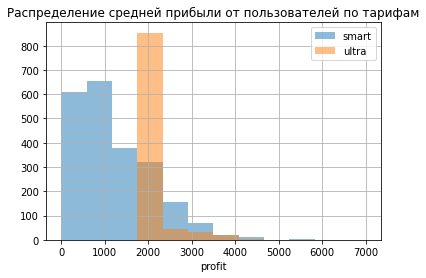

In [650]:
pd.Series(df_profit.query('tariff == "smart"')['all_profit']).hist(range = (0,7000),bins=12, label='smart', alpha=0.5)#построим гистограмму с предельными значениями из describe

pd.Series(df_profit.query('tariff == "ultra"')['all_profit']).hist(range = (0,7000),bins=12, label='ultra',  alpha=0.5)#построим гистограмму с предельными значениями из describe

plt.xlabel('profit')
plt.legend()
plt.title('Распределение средней прибыли от пользователей по тарифам')

Распределения имеют скошенность вправо.

Для проверки гипотезы требуется сравнивать средние двух генеральных совокупностей между собой. Наши совокупности (средняя выручка от того и другого тарифа) не зависят  друг от друга, распределения имеют скошенности, дисперсии рассмариваемых совокупностей не равны. Поэтому параметр 'equal_var' принимает значение False при -тесте:

In [651]:
alpha = .05 # критический уровень статистической значимости
            # можно указать .05 или 0.05

results = st.ttest_ind(df_profit.query('tariff == "smart"')['all_profit'], df_profit.query('tariff == "ultra"')['all_profit'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 3.155173205867294e-245
Отвергаем нулевую гипотезу


**Вывод:**
- нулевая гипотеза не верна
- средняя выручка по тарифу Смарт имеет значение отличное от средней выручки по тарифу Ультра.

### Гипотеза "Средняя вырчка пользователей из Москвы отличается от выручки пользователей из других регионов"

Для проверки гипотезы возьмем таблицу **'df_all_traffic'**

In [652]:
display(df_all_traffic)

,user_id,month,call,sms,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_call,over_sms,over_inet,values_call,values_sms,values_inet,profit,all_profit
0,1000,5,159.0,22.0,3.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2841.0,978.0,27.0,0.0,0.0,0.0,0.0,1950.0
1,1000,6,172.0,60.0,23.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2828.0,940.0,7.0,0.0,0.0,0.0,0.0,1950.0
2,1000,7,340.0,75.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2660.0,925.0,16.0,0.0,0.0,0.0,0.0,1950.0
3,1000,8,408.0,81.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2592.0,919.0,16.0,0.0,0.0,0.0,0.0,1950.0
4,1000,9,466.0,57.0,15.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2534.0,943.0,15.0,0.0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,10,247.0,42.0,21.0,68,2018-10-25 00:00:00,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50.0,15.0,500.0,550.0,200.0,3.0,3.0,253.0,8.0,-6.0,0.0,0.0,1200.0,1200.0,1750.0
3170,1499,9,70.0,11.0,2.0,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,50.0,15.0,500.0,550.0,200.0,3.0,3.0,430.0,39.0,13.0,0.0,0.0,0.0,0.0,550.0
3171,1499,10,449.0,48.0,18.0,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,50.0,15.0,500.0,550.0,200.0,3.0,3.0,51.0,2.0,-3.0,0.0,0.0,600.0,600.0,1150.0
3172,1499,11,612.0,59.0,18.0,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,50.0,15.0,500.0,550.0,200.0,3.0,3.0,-112.0,-9.0,-3.0,336.0,27.0,600.0,963.0,1513.0


Сформулируем нулевую и ненулевую гипотезы:
- H₀: средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов;
- H₁: средняя выручка пользователей из Москвы больше выручки пользователей из других регионов.


Остается только на основе данных сделать выбор: отклонить нулевую гипотезу в пользу альтернативной или нет.

Для этого нужно посчитать вероятность получить наблюдаемое на выборке среднее значение при условии, что нулевая гипотеза верна. Если вероятность большая — отвергать нулевую гипотезу вряд ли стоит.

У нас есть две выборки - данные по Москве и по остальным городам. Проверим дисперсии выборок по параметру 'mean_profit_month':

In [653]:
variance_Moscow = np.var(df_all_traffic.query('city == "Москва"')['all_profit'], ddof=1)
variance_other_city = np.var(df_all_traffic.query('city != "Москва"')['all_profit'], ddof=1)

print(variance_Moscow) 
print('')
print(variance_other_city) 

566297.7640744031

658497.796936696


Теперь посмотрим на распределение выборок:

In [654]:
print(df_all_traffic.query('city == "Москва"')['all_profit'].describe())
print(df_all_traffic.query('city != "Москва"')['all_profit'].describe())

count     610.000000
mean     1546.052459
std       752.527584
min       550.000000
25%       778.750000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: all_profit, dtype: float64
count    2564.000000
mean     1519.523791
std       811.478772
min       550.000000
25%       750.000000
50%      1553.500000
75%      1950.000000
max      6770.000000
Name: all_profit, dtype: float64


Text(0.5, 1.0, 'Распределение средней прибыли от пользователей по городам')

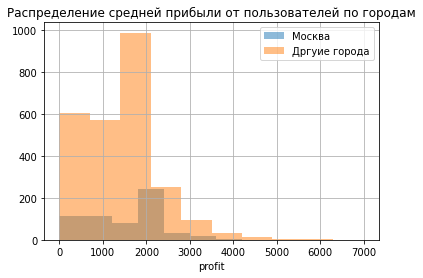

In [655]:
pd.Series(df_all_traffic.query('city == "Москва"')['all_profit']).hist(range = (0,6000),bins=10, label='Москва', alpha=0.5)#построим гистограмму с предельными значениями из describe

pd.Series(df_all_traffic.query('city != "Москва"')['all_profit']).hist(range = (0,7000),bins=10, label='Дргуие города',  alpha=0.5)#построим гистограмму с предельными значениями из describe

plt.xlabel('profit')
plt.legend()
plt.title('Распределение средней прибыли от пользователей по городам')

Оба распределения имеют скошенность.

Для проверки гипотезы требуется сравнивать средние двух генеральных совокупностей между собой. Наши совокупности (средняя выручка по городам) не зависят  друг от друга, распределения не имеют нормальный вид, дисперсии рассмариваемых совокупностей не равны. Поэтому параметр 'equal_var' принимает значение False при -тесте:

In [656]:
df_all_traffic['Moscow'] = df_all_traffic.query('city == "Москва"')['all_profit']
df_all_traffic['Other'] = df_all_traffic.query('city != "Москва"')['all_profit']
df_all_traffic = df_all_traffic.fillna(0)
display(df_profit_city)


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,call,sms,gb_used,over_call,over_sms,over_inet,values_call,values_sms,values_inet,profit,all_profit,Moscow,Other
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,3.0,2841.0,978.0,27.0,0.0,0.0,0.0,0.0,1950.0,0.0,1950.0
1,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,60.0,23.0,2828.0,940.0,7.0,0.0,0.0,0.0,0.0,1950.0,0.0,1950.0
2,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,75.0,14.0,2660.0,925.0,16.0,0.0,0.0,0.0,0.0,1950.0,0.0,1950.0
3,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,81.0,14.0,2592.0,919.0,16.0,0.0,0.0,0.0,0.0,1950.0,0.0,1950.0
4,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,57.0,15.0,2534.0,943.0,15.0,0.0,0.0,0.0,0.0,1950.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,1498,68,2018-10-25 00:00:00,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,247.0,42.0,21.0,253.0,8.0,-6.0,0.0,0.0,1200.0,1200.0,1750.0,0.0,1750.0
3178,1499,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,70.0,11.0,2.0,430.0,39.0,13.0,0.0,0.0,0.0,0.0,550.0,0.0,550.0
3179,1499,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,449.0,48.0,18.0,51.0,2.0,-3.0,0.0,0.0,600.0,600.0,1150.0,0.0,1150.0
3180,1499,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,612.0,59.0,18.0,-112.0,-9.0,-3.0,336.0,27.0,600.0,963.0,1513.0,0.0,1513.0


In [657]:
alpha = .05 # критический уровень статистической значимости
            # можно указать .05 или 0.05

results = st.ttest_ind(df_all_traffic.query('Moscow != 0')['Moscow'], df_all_traffic.query('Other != 0')['Other'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.44113705815091153
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
- нулевая гипотеза верна
- средняя выручка пользователей из Москвы имеет значение отличное от выручки пользователей из других регионов.

### Выручка компании по каждому тарифу

In [659]:
profit_mean_smart = df_profit.query('tariff=="smart"')['all_profit'].sum()
print('Выручка компании за год по тарифу СМАРТ:', profit_mean_smart)
print('')
profit_mean_ultra = df_profit.query('tariff=="ultra"')['all_profit'].sum()
print('Выручка компании за год по тарифу УЛЬТРА:', profit_mean_ultra)

Выручка компании за год по тарифу СМАРТ: 2869651.0

Выручка компании за год по тарифу УЛЬТРА: 1969500.0


## ВЫВОДЫ

Согласно представленным входным данным проведен анализ пользователей тарифов СМАРТ и УЛЬТРА. 

Для начала был выявлен ряд несоответствий, пропуски данных, неверные форматы и тд. Такие моменты были устранены. Дополнительно было проведено слияние нескольких файлов данных  в единый удобный файл. 

По каждому тарифу был проведен анализ звонков/мин, смс/шт и интрнет-трафика/Гб за каждый месяц 2018 года. Анализ показал, что
среднее количество трафика по звонкам, сообщениям и интернету растут по обоим тарифам в течение года.Что говорит о том, что потребности в трафике увеличиваются. И со временем пользователь будет искать другой тариф, если его траты будут выходить за абонентскую плату.

Кроме того, по обоим тарифам пользователи тратят меньше трафика чем его медианное значения, что говорит о том, что оператору смысла увеличивать количество минут по тарифам. Снижение предлагаемых в тарифе минут, смс и Гб может привести к увеличению дохода компании, т.к. пользователи будут вынуждены платить сверх норм.

Проведен анализ доходности оператора по каждому тарифу. Учитывая, что в базе  351 пользователь тарифа Смарт (70%) против 149 пользователей тарифа Ультра (30%), доходность от тарифа Смарт составляет 62% всего дохода оператора за год. 

В среднем доход с пользователя тарифа Смарт составляет 2 869 651/351 = 8 176 руб/год.
В среднем доход с пользователя тарифа Ультра составляет 1 969 500/149 = 13 218 руб/год.

Оператору есть смысл продвигать тариф Ультра, приносящий больше дохода с пользователя. 


Далее проверили несколько гипотез и установили:
- средние выручки пользователей тарифов Ультра и Смарт отличаются;
- средние выручки пользователей тарифа из Москвы и регионов не отличаются.


Можно сделать предположение: выручка будет статистически значимо меньше. А значит оператору можно предложить изменить условия тарифа Смарт, а также попробовать разработать тариф для Москвы, если есть необходимость увеличить прибыльность компании за счет такой выбранной аудитории.


Для проверки гипотез бралась выборка:
- выручки в месяц с каждого пользователя по тарифу Смарт за месяц в сравнении с величиной средней выручки по тарифу Ультра;
- выручки в месяц с каждого пользователя Москвы за месяц в сравнении с величиной средней выручки пользователей прочих регионов.